In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import array, arange, linspace, meshgrid, cos, sin, pi, tan, abs, exp, log, arctan, sqrt, inf
from ipywidgets import interact,fixed
from scipy.integrate import quad, dblquad, tplquad
from IPython.display import display,clear_output
import ipywidgets as widgets

%matplotlib inline

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\newcommand{\R}{\mathbb{R}}$

## Examples - Polar Coordinates

  1. Find the volume under a paraboloid $z=a^2-x^2-y^2$ and above $z=0$ in terms of $a$ where $a>0$.
  

  2. Find the volume of the region above the $xy$-plane, under the surface $z=x^2+y^2$ and inside the cylinder $x^2 +(y-1)^2 =1$.
  

<p style="padding-bottom:40%;"> </p>

#### Exercise

Sketch the region of integration in the definite integral below and then evaluate it using polar coordinates. 

$$\int_0^1\int_{\sqrt{1-x^2}}^{\sqrt{4-x^2}} x\,dy\,dx + \int_1^2\int_{0}^{\sqrt{4-x^2}} x\,dy\,dx$$
  

<p style="padding-bottom:40%;"> </p>

### Cool Example

Compute $$\int_{-\infty}^\infty e^{-x^2}\,dx.$$

<p style="padding-bottom:40%;"> </p>

### Exercise - Center of Mass

Take the top half of the annulus $\{(x,y) \mid 1 \leq x^2 + y^2 \leq 4\}$. Does this region contain its **centroid** (center of mass with uniform density)?

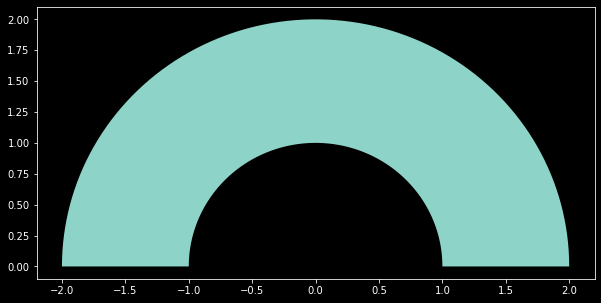

In [13]:
t = np.linspace(0,pi,100)
plt.figure(figsize=(10,5))
plt.fill(np.concatenate([-cos(-t),2*cos(t)]),np.concatenate([sin(t),2*sin(t)]));

<p style="padding-bottom:40%;"> </p>

### Exercise - Moment of Inertia

Set up integrals to compute the moments of inertia for the annular region above about 

  - the origin
  - the $x$-axis
  - the line $x=-1$.

![The region D spinning abut the z-axis in 3 different configurations.](../img/constant_L.gif)

<p style="padding-bottom:40%;"> </p>

### Bonus question

Call that half-annular region above $\mathcal A$. Let $r$ be the usual polar coordinate. Is the expression 

$$\frac{\iint_{\mathcal A} r\,dA}{\iint_{\mathcal A} \,dA}$$ the $r$-coordinate of the centroid? Why or why not?

<p style="padding-bottom:40%;"> </p>

## Example - Probability

Suppose a straw is creased at two random points along its length. What is the probability the three resulting sections can be folded into a triangle?

In [16]:
button = widgets.Button(description='New straw')
out = widgets.Output()
def on_button_clicked(_):
      # "linking function with output"
    v = np.random.rand(2)
    with out:
        # what happens when we press the button
        clear_output()
        @interact(t=(0.,1.))
        def _(t=0):
            v.sort()
            x,y = v

            a = x
            b = y-x
            c = 1-y

            if ((a**2+b**2 - c**2)/(2*a*b))**2 <= 1:
                alpha = np.arccos((a**2+b**2 - c**2)/(2*a*b))
            else:
                alpha=0
            if ((-a**2+b**2 + c**2)/(2*c*b))**2 <= 1:
                beta = np.arccos((-a**2+b**2 + c**2)/(2*c*b))
            else:
                beta=0

            fig = plt.figure(figsize=(8,8))
            ax = fig.add_subplot(111)
            ax.plot([a+a*cos((1-t)*pi + t * alpha),a,y,y-c*cos((1-t)*pi + t * beta)],[a*sin((1-t)*pi + t * alpha),0,0,c*sin((1-t)*pi + t * beta)])
            ax.set_xlim([-.1,1])
            ax.set_ylim([-.1,1])
            ax.axis('off')
            ax.scatter([x,y],[0,0])
# linking button and function together using a button's method
button.on_click(on_button_clicked)
# displaying button and its output together
widgets.VBox([button,out])